## 10 Sept 2019

<strong>RULES</strong><br>
<strong>Date:</strong> Level 2 heading ## <br>
<strong>Example Heading:</strong> Level 3 heading ###<br>
<strong>Method Heading:</strong> Level 4 heading ####

### Imports

In [1]:
import numpy as np
import math
import sympy
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from IPython.display import display_latex
from sympy import latex

### Setup

In [2]:
sympy.init_printing()
np.set_printoptions(precision=3)

### Functions

In [3]:
# Usage: display_equation('u_x', x)
def display_equation(idx, symObj):
    if(isinstance(idx, str)):
        eqn = '\\[' + idx + ' = ' + latex(symObj) + '\\]'
        display_latex(eqn, raw=True)
    else:
        eqn = '\\[' + latex(idx) + ' = ' + latex(symObj) + '\\]'
        display_latex(eqn, raw=True)
    return

In [4]:
def rotation(theta):
    theta = (np.pi / 180) * theta
    R = np.zeros((3, 3))
    R[0][0] = np.cos(theta)
    R[0][1] = -np.sin(theta)
    R[0][2] = 0
    R[1][0] = np.sin(theta)
    R[1][1] = np.cos(theta)
    R[1][2] = 0
    R[2][0] = 0
    R[2][1] = 0
    R[2][2] = 1
    return R

In [5]:
def createEquivRot(theta, K):
    R = np.zeros((3, 3))
    theta = (np.pi / 180) * theta
    
    R[0][0] = K[0][0] * K[0][0] * (1 - math.cos(theta)) + math.cos(theta)
    R[0][1] = K[0][0] * K[1][0] * (1 - math.cos(theta)) - K[2][0] * math.sin(theta)
    R[0][2] = K[0][0] * K[2][0] * (1 - math.cos(theta)) + K[1][0] * math.sin(theta)

    R[1][0] = K[0][0] * K[1][0] * (1 - math.cos(theta)) + K[2][0] * math.sin(theta)
    R[1][1] = K[1][0] * K[1][0] * (1 - math.cos(theta)) + math.cos(theta)
    R[1][2] = K[1][0] * K[2][0] * (1 - math.cos(theta)) - K[0][0] * math.sin(theta)

    R[2][0] = K[2][0] * K[2][0] * (1 - math.cos(theta)) - K[1][0] * math.sin(theta)
    R[2][1] = K[1][0] * K[2][0] * (1 - math.cos(theta)) + K[0][0] * math.sin(theta)
    R[2][2] = K[2][0] * K[2][0] * (1 - math.cos(theta)) + math.cos(theta)
    return R

In [6]:
def vplot2d(O, a, origin_label='O', tip_label='P'):
    dx = a[0][0] - O[0][0]
    dy = a[1][0] - O[1][0]

    head_length = 0.3
    vec_ab = [dx,dy]

    vec_ab_magnitude = math.sqrt(dx**2+dy**2)

    dx = dx / vec_ab_magnitude
    dy = dy / vec_ab_magnitude

    vec_ab_magnitude = vec_ab_magnitude - head_length

    ax = plt.axes()
    ax.set_aspect('equal', 'box')
    #ax.axis([-range, range, -range, range]) Sub for xlim and ylim

    ax.arrow(O[0][0], O[1][0], vec_ab_magnitude*dx, vec_ab_magnitude*dy, head_width=0.1, head_length=head_length, fc='lightblue', ec='black')
    plt.scatter(O[0][0],O[1][0],color='black')
    plt.scatter(a[0][0],a[1][0],color='black')

    ax.annotate(origin_label, (O[0][0]-0.4,O[1][0]),fontsize=14)
    ax.annotate(tip_label, (a[0][0]+0.3,a[1][0]),fontsize=14)
    return

In [7]:
def vplot3d(O, P, origin_label='O', tip_label='P'):
    mpl.rcParams['legend.fontsize'] = 10

    ax = fig.gca(projection='3d')
    x = np.linspace(O[0][0], P[0][0], 100)
    y = np.linspace(O[1][0], P[1][0], 100)
    z = np.linspace(O[2][0], P[2][0], 100)
    
    ax.plot(x, y, z, label=tip_label)
    ax.scatter(P[0][0], P[1][0], P[2][0], marker='x')
    ax.axis('equal')
    ax.legend()
    return

In [8]:
# plot a frame 
def fplot3d(B, T = np.identity(4), origin_label='O', tip_label='P', x_range = [-2, 2], y_range = [-2, 2], z_range=[-2, 2]):
    mpl.rcParams['legend.fontsize'] = 10
    m = 1

    ax = fig.gca(projection='3d')
    R = T[:3,:3]
    
    B = np.expand_dims(T[:3,3], axis=0).T
    
    Bx = homTrans(T, np.array([[m, 0, 0]]).T)
    By = homTrans(T, np.array([[0, m, 0]]).T)
    Bz = homTrans(T, np.array([[0, 0, m]]).T)
    
    vplot3d(B, Bx, origin_label='B', tip_label='x')
    vplot3d(B, By, origin_label='B', tip_label='y')
    vplot3d(B, Bz, origin_label='B', tip_label='z')
    
    ax.scatter(B[0][0], B[1][0], B[2][0], marker='x')
    ax.axis('equal')
    ax.set_aspect('equal')
    ax.auto_scale_xyz(x_range, y_range, z_range)
    #ax.pbaspect= [20, 2, 2]
    ax.legend()
    return

In [9]:
def homTrans(T, A):
    R = T[:3,:3]
    return (R @ A) + np.expand_dims(T[:3,3], axis=0).T

In [10]:
#tVec (translation vector) is a column vector, e.g. tMat = np.array([[10],[5],[0]])
# r is either a 3x3 rotation transformation matrix or an angle in degrees
def createHomTrans(r, tVec):
    tVec = np.vstack((tVec, [1]))
    T = np.zeros((4, 4))
        
    if (isinstance(r, np.ndarray)):
        T = np.vstack((r, np.array([0, 0, 0])))
    else:
        T = np.vstack((rotation(r), np.array([0, 0, 0])))
    
    T = np.append(T, tVec, axis=1)
    return T

### Example 2.1

In [11]:
R = rotation(30)
BP = np.array([[0.0], [2.0], [0.0]])
# print(R.dot(BP))
AP = R @ BP # New operator since python 3.5
print(AP)

[[-1.   ]
 [ 1.732]
 [ 0.   ]]


c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


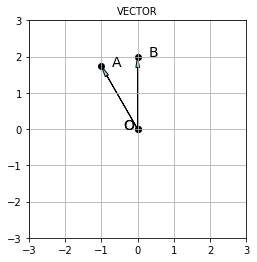

In [12]:
range = 3
O = [[0],[0], [0]]
vplot2d(O, AP, tip_label='A')
vplot2d(O, BP, tip_label='B')
    
plt.grid()

plt.xlim(-range,range)
plt.ylim(-range,range)

plt.title('VECTOR',fontsize=10)
plt.show()

FIGURE: 2D plot

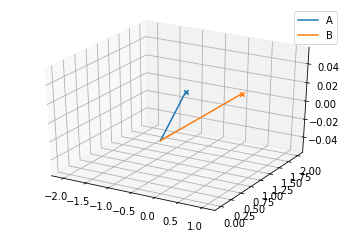

In [13]:
O = [[0],[0], [0]]
fig = plt.figure()
vplot3d(O, AP, tip_label='A')
vplot3d(O, BP, tip_label='B')
plt.show()

FIGURE: 3D plot

## 11 Sept 2019

### Example 2.2

In [14]:
O = [[0],[0], [0]]
tVec = np.array([[10],[5],[0]])
A = np.array([[3], [7], [0]])
T = createHomTrans(30, tVec)
result = homTrans(T, A)
print(result)

[[ 9.098]
 [12.562]
 [ 0.   ]]


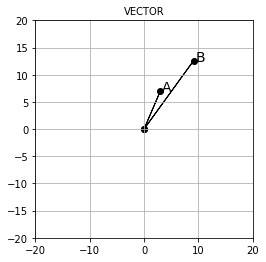

In [15]:
range = 20
vplot2d(O, A, tip_label='A', origin_label='')
vplot2d(O, result, tip_label='B', origin_label='')
    
plt.grid()

plt.xlim(-range,range)
plt.ylim(-range,range)

plt.title('VECTOR',fontsize=10)
plt.show()

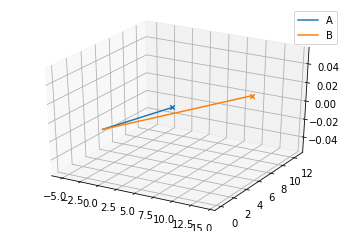

In [16]:
O = [[0],[0], [0]]
fig = plt.figure()
vplot3d(O, A, tip_label='A')
vplot3d(O, result, tip_label='B')
plt.show()

### Example 2.5

#### Method 1

In [17]:
# Inverting the 4x4 matrix
O = [[0],[0], [0]]
tVec = np.array([[4],[3],[0]])
ATB = createHomTrans(30, tVec)
BTA = np.linalg.inv(T)
print(BTA)

[[  0.866   0.5     0.    -11.16 ]
 [ -0.5     0.866   0.      0.67 ]
 [  0.      0.      1.      0.   ]
 [  0.      0.      0.      1.   ]]


#### Method 2

In [18]:
# Using the method in the book
R = rotation(30)
tVec = np.array([[4],[3],[0]])
R = R.T
tVec = -R @ tVec
BTA = createHomTrans(R, tVec)
print(BTA)

[[ 0.866  0.5    0.    -4.964]
 [-0.5    0.866  0.    -0.598]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]


## 12 Sept 2019

### X-Y-Z Fixed Angles Representation Derivation

In [19]:
c_a, c_b, c_y = sympy.symbols('c_alpha c_beta c_gamma')
s_a, s_b, s_y = sympy.symbols('s_alpha s_beta s_gamma')

R_z = sympy.Matrix([[c_a, -s_a, 0], [s_a, c_a, 0], [0, 0, 1]])
R_y = sympy.Matrix([[c_b, 0, s_b], [0, 1, 0], [-s_b, 0, c_b]])
R_x = sympy.Matrix([[1, 0, 0], [0, c_y, -s_y], [0, s_y, c_y]])

R = R_z * R_y * R_x
display_equation('R_z', R_z)
display_equation('R_y', R_y)
display_equation('R_x', R_x)
display_equation('R = R_z R_y R_x', R)


### Equivalent angleâ€”axis representation

In [20]:
#k_x, k_y, k_z, c, s = sympy.symbols('k_x k_y k_z c_theta s_theta')
#R_theta = sympy.symbols('R_theta')
#R_x = Matrix([[1, 1, 0], [0, c, -s], [0, s, c]])
#R_y = Matrix([[c, 0, s], [0, 1, 0], [-s, 0, c]])
#R_z = Matrix([[c, -s, 0], [s, c, 0], [0, 0, 1]])

# To be completed

### Example 2.8

In [21]:
O = np.zeros((3, 1))
R = np.zeros((3, 3))
K = np.array([[0.7070, 0.7070, 0]]).T
tVec = np.array([[1.0, 2.0, 3.0]]).T

R = createEquivRot(30, K)
T = createHomTrans(R, O)

print(T)

[[ 0.933  0.067  0.353  0.   ]
 [ 0.067  0.933 -0.353  0.   ]
 [-0.353  0.353  0.866  0.   ]
 [ 0.     0.     0.     1.   ]]


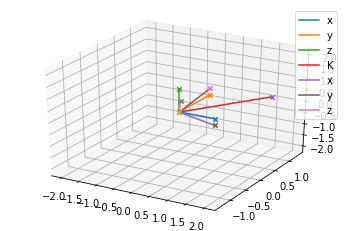

In [22]:
m = 2 # This is a magnitude scalar to make K visible in the plot
A = np.zeros((3, 1))
fig = plt.figure()
# Origin frame
fplot3d(A, tip_label='B')
vplot3d(A, K * m, origin_label='A', tip_label='K')
fplot3d(A, T, tip_label='B',
        x_range = [-2, 2], y_range = [-2, 2], z_range = [-2, 2])
plt.show()

## 13 Sept 2019

[[ 0.933  0.067  0.353 -1.127]
 [ 0.067  0.933 -0.353  1.128]
 [-0.353  0.353  0.866  0.048]
 [ 0.     0.     0.     1.   ]]


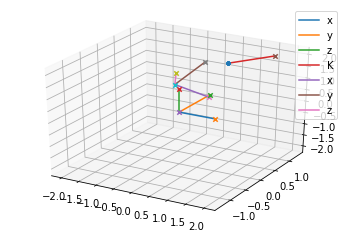

In [23]:
O = np.zeros((3, 1))
R = np.zeros((3, 3))
K = np.array([[0.7070, 0.7070, 0]]).T
tVec = np.array([[1.0, 2.0, 3.0]]).T
P = np.array([[1.0, 2.0, 3.0]]).T

R = createEquivRot(30, K)
BTB = createHomTrans(0, -tVec)
ATA = createHomTrans(0, tVec)
ATB = createHomTrans(R, O)

T = ATA @ ATB @ BTB
print(T)

m = 2 # This is a magnitude scalar to make K visible in the plot
A = np.zeros((3, 1))
P *= 0.5

S = P + K

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(P[0][0], P[1][0], P[2][0], marker='P')

fplot3d(A, tip_label='B')
vplot3d(P, S, origin_label='A', tip_label='K')
fplot3d(A, T, tip_label='B',
        x_range = [-2, 2], y_range = [-2, 2], z_range = [-2, 2])
plt.show()

### How to show two frames where one is the origin, and the other is transformed

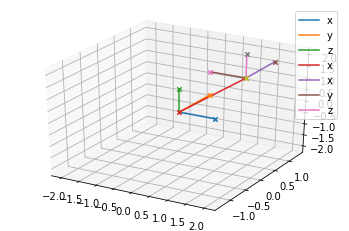

In [24]:
A = np.zeros((3, 1))
R = rotation(90)
tVec = np.ones((3, 1))
T = createHomTrans(R, tVec)
#print(T)
fig = plt.figure()
# Origin frame
fplot3d(A, tip_label='B')
# B vector
vplot3d(A, tVec, origin_label='B', tip_label='x')
# B vector frame
fplot3d(A, T, tip_label='B',
        x_range = [-2, 2], y_range = [-2, 2], z_range = [-2, 2])
plt.show()